<a href="https://colab.research.google.com/github/sooonsyk/ESAA/blob/main/Week9_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**평가**
- 머신러닝은 데이터 가공/변환, 모델 학습/예측, 그리고 평가의 프로세스로 구성됨
- 성능 평가 지표 Evaluation Metric 는 일반적으로 모델이 분류나 회귀냐에 따라 여러 종류로 나뉨
  - 회귀의 경우 대부분 실제값과 예측값의 오차 평균값에 기반
  - 분류의 평가방법도 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있음
- 분류의 성능 평가 지표
  - 정확도
  - 오차행렬
  - 정밀도
  - 재현율
  - F1 스코어
  - ROC AUC
- 분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 이진 분류와 여러 개의 결정 클래스 값을 가지는 멀티 분류로 나뉠 수 있음 - 위에서 언급한 분류의 성능 지표는 이진/멀티 분류 모두에 적용되는 지표이지만 특히 이진 분류에서 더욱 중요하게 강조하는 지표

##**정확도 Accuracy**

**정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수**
- 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표
  - 하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능으로 평가하지 않음
- 정확도 지표가 ML모델의 성능을 어떻게 왜곡하는지를 보여주는 예시

  : 앞의 타이타닉 예제 수행 결과를 보면 ML 알고리즘을 적용한 후 예측 정확도의 결과가 보통 80% 대였지만, 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 별다른 알고리즘의 적용 없이 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측 결과를 예측해도 이와 비슷한 수치가 나올 수 있음 - 단지 성별 조건 하나만을 가지고 결정하는 별거 아닌 알고리즘도 높은 정확도를 나타내는 상황 발생






In [2]:
# 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier 생성
# 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있음

# fit() 메서드는 아무것도 수행하지 않으며 예측을 수행하는 predict() 메서드는 단순히 Sex 피쳐가 1이면 0, 그렇지 않으면 1로 예측
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):

  def fit(self, x, y=None):
    pass                

  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else :
        pred[i] = 1
    return pred      

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

#머신러닝 알고리즘에 불필요한 속성제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

# 원본 데이터 로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

In [4]:
#위에서 생성한 Dummy Classifier 를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도 : 0.7877


- 이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 꽤 높은 수치가 나올 수 있기 때문에 정확돌를 평가 지표로 사용할 때 매우 신중해야함
- 특히 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님

- MNISt 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤 정확도 지표 적용시 어떤 문제가 발생하는지 확인
  - MNIST 데이터 세트는 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며 이를 기반으로 숫자 Digit 예측하는 데 사용
  - 원래 MNIST 데이터 세트는 레이블 값이 0부터 9까지 있는 멀티 레이블 분류를 위한 것 - 이것을 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환해 이진 분류 문제로 바꿈 즉, 전체 데이터의 10% 만 True, 나머지 90%는 False인 불균형한 데이터 세트로 변형
    - 이런 불균형한 데이터 세트에 모든 데이터를 False 즉 0으로 에측하는 classifier를 이용해 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타냄

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass
  
  #입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

#사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


- 단순히 predict()의 결과를 np.zeros()로 모두 0값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%임
- 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용해서는 안 됨

##**오차 행렬**
- 이진 분류에서 성능 지표로 잘 활용되는 오차행렬/혼동행렬은 학습된 분류 모델이 에측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
- 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타냄
- 4분면의 왼쪽, 오른쪽을 예측된 클래스 값을 기준으로 Negative와 Positive로 분류하고 4분면의 위, 아래를 실제 클래스 값 기준으로 Negative와 Positive로 분류하면 예측 클래스와 실제 클래스의 값 유형에 따라 결정되는 TN, FP, FN, TP 형태로 오차 행렬의 4분면 채울 수 있음


| |N|P|
|--|--|--|
|N|TN|FP|
|P|FN|TP|

- TN : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
- FP : 예측값을 Positive 값 1로 에측했는데 실제 값은 Negative 값 0
- FN : 예측값을 Negative 값 0으로 예측했고 실제 값은 Positive 값 1
- TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1


In [6]:
from sklearn.metrics import confusion_matrix

#MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현, 예측결과인 fakepred와 실제 결과인 y_test를 인자로 입력, 배열 형태로 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

- 출력된 오차 행렬은 ndarray 형태
- TP, TN, FP, TN 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보 제공 - 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도, 정밀도, 재현율 값을 알 수 있음
  - 정확도 = (TN + TP)/(TN + FP + FN + NP)
- 일반적으로 이러한 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고 그렇지 않은 경우는 Negative로 0 값을 부여함
- 불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive 보다는 Negative로 예측 정확도가 높아지는 경향이 발생
- 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류 일으킴

##**정밀도와 재현율**
- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표

**정밀도 = TP / (FP + TP)** : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율, 양성 예측도

**재현율 = TP / (FN + TP)**  : 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율, 민감도, TPR(True Positivde Rate)

- 정밀도와 재현률 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있음
  - 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 - 암 판단 모델, 금융 사기 적발 모델
  - 보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많지만 정밀도가 더 중요한 지표인 경우도 있음, 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 - 스팸메일 여부 판단 모델
- 재현율과 정밀도 모두 TP를 높이는데 동일하게 초점을 맞추지만, 재현율은 FN을 낮추는데 정밀도는 FP를 낮추는데 초점을 맞춤
- 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred): #평가 한번에 호출하는 함수
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state = 11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)
#정밀도에 비해 재현율이 낮게 나옴

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율:0.7869


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


###**정밀도/재현율 트레이드오프**
- 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값 Threshold을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움 - 이를 정밀도/재현율 트레이드오프라고 부름
- 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 ㅁ너저 개별 레이블별로 결정 확률을 구함. 그리고 예측 확률이 큰 레이블값으로 예측하게 됨. 일반적으로 이진 분류에서는 이 임계값을 0.5 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정

- predict_proba() : 학습이 완료된 사이킷런 Classifier 객체에서 호출 가능, 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함, predict()와 유사하지만 단지 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과임
  - 개별 클래스의 예측 확률을 입력 값의 레코드 수 * 클래스 값 유형 의 ndarray 형태로 반환

In [9]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'. format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출\n', pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
 [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


- 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫번재 칼럼 값과 두번째 칼럼 값을 더하면 1이 됨
- 맨 마지막 줄의 predict() 메서드의 결과 비교에서도 나타나듯이 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측함 - predict()는 predict_proba() 기반으로 만들어진 API

In [10]:
#Binarizer 클래스
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

#X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [11]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold = 0.5

#predict_proba() 반환값의 두번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율:0.7869


In [12]:
#threshold 값을 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

#임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어졌음

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율:0.8361


In [13]:
#임겟값을 0.4에서부터 0.6까지 0.05씩 증가시키며 조사

#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.44, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  #threshold list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

#0.45가 0.5와 비교하여 정확도는 동일하고 정밀도는 약간 떨어졌으나 재현율이 올랐음, 가장 적당해보임

임곗값: 0.44
오차행렬
[[101  17]
 [ 11  50]]
정확도 : 0.8436, 정밀도 : 0.7463, 재현율:0.8197
임곗값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율:0.8033
임곗값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율:0.7869
임곗값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율:0.7541
임곗값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율:0.7377


- precision_recall_curve() 
  - 입력 파라미터 : y_true - 실제 클래스 값 배열, probas_pred - Positive 칼럼의 예측 확률 배열
  - 반환 값 : 임곗값별 정밀도, 재현율


In [14]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 stepdmfh cncnf
thr_index = np.arange(0,thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index],3))

#임곗값이 증가할수록 정밀도값은 높아지나 재현율은 낮아짐

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임곗값 배열의 index 10개 : [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


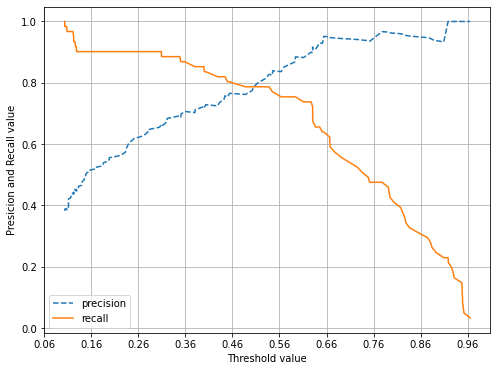

In [15]:
#정밀도와 재현율의 임계값에 다른 값 변화를 곡선 형태의 그래프로 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  #X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start,end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  plt.xlabel('Threshold value')
  plt.ylabel('Presicion and Recall value')
  plt.legend()
  plt.grid()


precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

###**정밀도와 재현율의 맹점**
- 임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 함
- 정밀도가 100%가 되는 법 : 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측
- 재현율이 100%가 되는 법 : 모든 환자를 Positive로 예측

##**F1 스코어**
- 정밀도와 재현율을 결합한 지표, 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

**F1 = 2/( 1/recall + 1/precision) = 2 * precision*recall/ (precision + recall)**

In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [ ]:
def get_clf_eval(y_test, pred): #평가 한번에 호출하는 함수
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)

  #F1 스코어 추가
  f1 = f1_score(y_test, pred)

  print('오차행렬')
  print(confusion)

  #F1 스코어 추가  
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

#임곗값이 0.6일 때 가장 좋은 값을 보여줌 하지만 재현율이 크게 감소하므로 주의

##**ROC곡선과 AUC**
- 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
- ROC 곡선 : 수신자 판단 곡선, FRR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선
 - TPR는 재현율, 민감도, 민감도에 대응하는 지표로 TNR(True Negative Rate) 라고 불리는 특이성이 있음
 - TNR은 실제값 음성이 정확히 예측돼야 하는 수준을 나타냄, TN/(FP + TN)
 - FPR은 1 - TNR 로 표현
 - ROC 곡선이 가운데 직선에 가까울수록 성능이 덜어짐, 분류 결정 임곗값을 변경해서 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함
  - FPR을 0으로 만들려면 임곗값을 1로 지정하면 됨 - positive 예측 기준이 매우 높기 때문에 분류기가 임곗값보다 높은 확률을 가진 데이터를 positive라 예측할 수 없기 때문 따라서 FP가 0이 되므로 FPR도 0이 됨
  - FPR을 1로 만들려면 TN을 0으로 만들면 됨 - 분류 결정 임곗값을 0으로 지정하면 다 Positive로 예측하므로 TN이 0이 되고 FPR값은 1이됨
- roc_curve()
  - 입력 파라미터 : y_true - 실제 클래스 값 array, y_score - predict_proba()의 반환 값 array에서 Positive 칼럼의 예측 확률이 보통 사용됨
  - 반환 값 : FPR, TPR, 임곗값

In [18]:
from sklearn.metrics import roc_curve

#레이블값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 스텝으로 추출
#thresholds[0]은 max(예측확률)+1로 임의 설정됨, 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임곗값 : ', np.round(thresholds[thr_index],2))

#5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index],3))

#임곗값이 1에 가까운 갑세서 점점 작아지면서 FPR이 점점 커짐, FPR이 조금씩 커질 때 TPR은 가파르게 커짐

샘플 추출을 위한 임곗값 배열의 index 10개 :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값 :  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


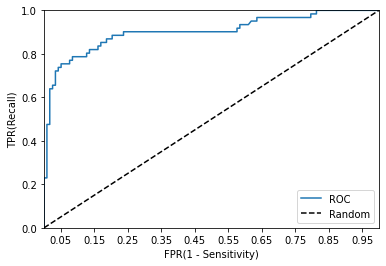

In [20]:
def roc_curve_plot(y_test, pred_proba_c1):

  #임곗값에 따른 FPR, TPR 값을 반환받음
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

  #ROC 곡선을 그래프 곡서능로 그림
  plt.plot(fprs, tprs, label='ROC')

  #가운데 대각선 직선 그림
  plt.plot([0,1],[0,1],'k--', label='Random')

  #FPR X 축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1 - Sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

- 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정
- AUC 값은 곡선 및의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치
  - AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수가 있는냐가 관건

In [23]:
def get_clf_eval(y_test, pred=None, pred_proba=None): #평가 한번에 호출하는 함수
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  #ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))